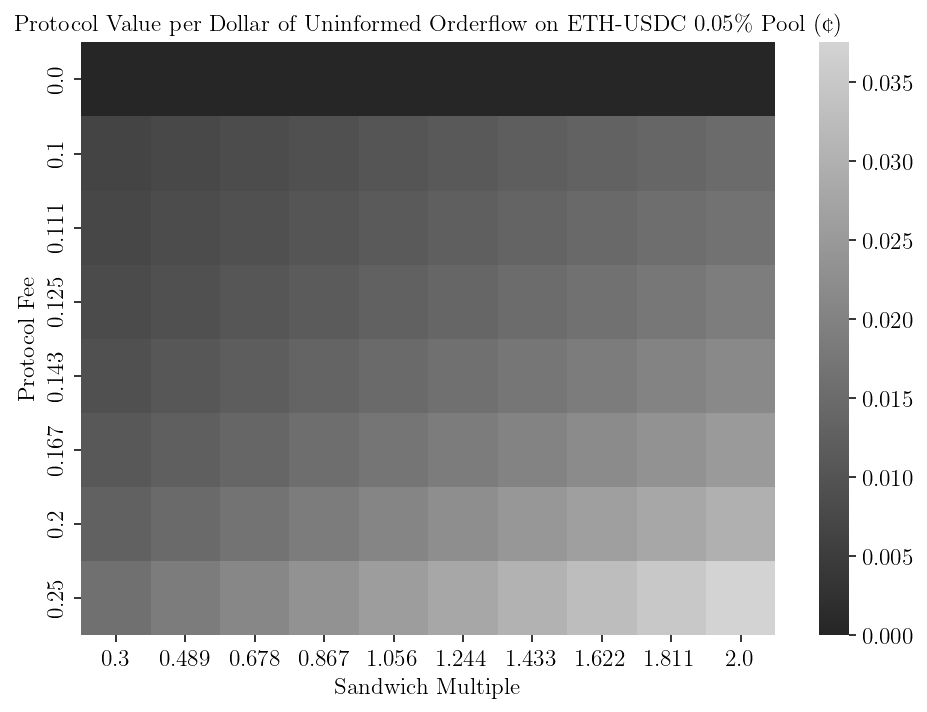

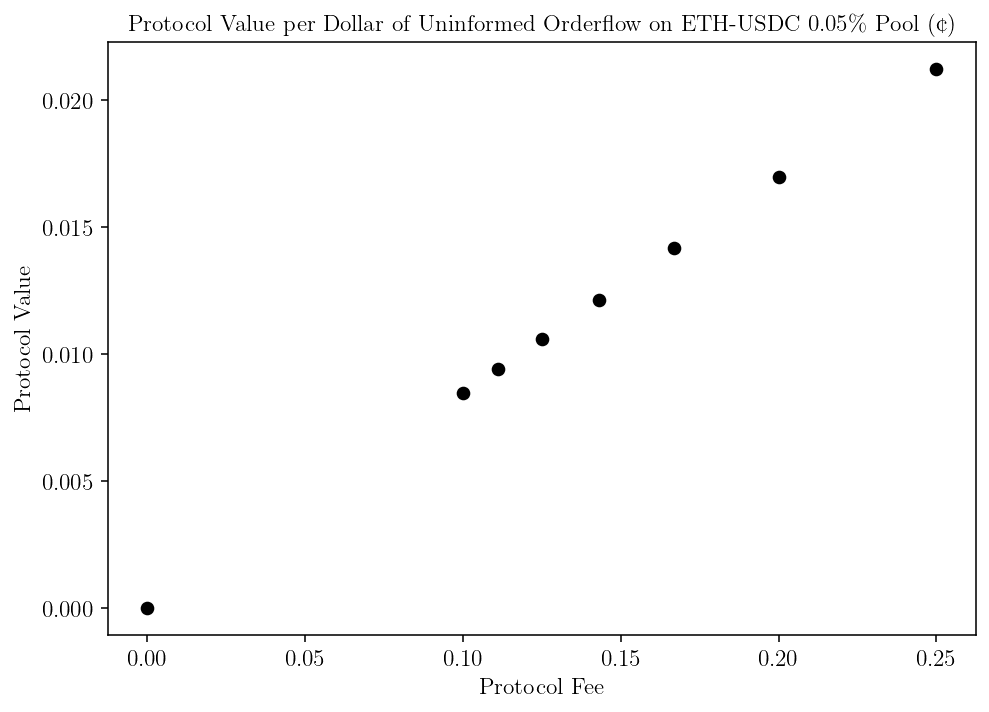

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from latexify import latexify

def tst():
    def calcvaluepct(phi_, sigma_):
        gamma = .0005 # .05/100
        return 100*gamma*phi_ * (1 + sigma_)
        
    num_phis = 8
    num_sigmas = 10
    res = np.zeros((num_phis, num_sigmas))

    phis = [0] + [1/denom for denom in range(10, 3, -1)]
    phis = [round(phi, 3) for phi in phis]

#     print(np.apply_along_axis(lambda x: round(x, 4), 0, phis))
    sandwich_mults = np.linspace(.3, 2.0, num_sigmas)
    sandwich_mults = [round(mult, 3) for mult in sandwich_mults]

    for i, phi in enumerate(phis):
        for j, sigma in enumerate(sandwich_mults):
            res[i][j] = calcvaluepct(phi, sigma) # report the value in units of cents

    res = pd.DataFrame(
        res,
        index=phis,
        columns=sandwich_mults
    )

    latexify(fig_width=8, fig_height=5.5)
    sns.heatmap(
        res,
        cmap=sns.dark_palette("#D3D3D3", as_cmap=True),
#         annot=True
    )
    plt.title("Protocol Value per Dollar of Uninformed Orderflow on ETH-USDC 0.05\% Pool (¢)")
    plt.xlabel("Sandwich Multiple")
    plt.ylabel("Protocol Fee")
    plt.savefig("/Users/max/Desktop/sandwich-mult-heatmap.pdf")
    plt.show()
    
    cur_sandwich_multiple = .6969
    latexify(fig_width=8, fig_height=5.5)
    plt.scatter(
        phis,
        [calcvaluepct(phi, cur_sandwich_multiple) for phi in phis],
        color="black",
    )
    plt.title("Protocol Value per Dollar of Uninformed Orderflow on ETH-USDC 0.05\% Pool (¢)")
    plt.ylabel("Protocol Value")
    plt.xlabel("Protocol Fee")
    plt.savefig("/Users/max/Desktop/sandwich-mult-value-scatter.pdf")
#     plt.show()
    
    
#     return res

tst()